Sp60

6.2.2 Системы отопления должны обеспечивать требуемую температуру воздуха в помещениях, учитывая:
- потери теплоты через ограждающие конструкции;
- расход теплоты на нагревание наружного воздуха, проникающего в помещения за счет инфильтрации или путем организованного притока через оконные клапаны, форточки, фрамуги и другие устройства для вентиляции помещений в объеме нормативного воздухообмена, если в этих помещениях не предусмотрена механическая приточная вентиляция;
- расход теплоты на нагревание материалов, оборудования и транспортных средств;
- тепловой поток, регулярно поступающий от электрических приборов, освещения, технологического оборудования, трубопроводов, людей и других источников тепла.


Малякина 
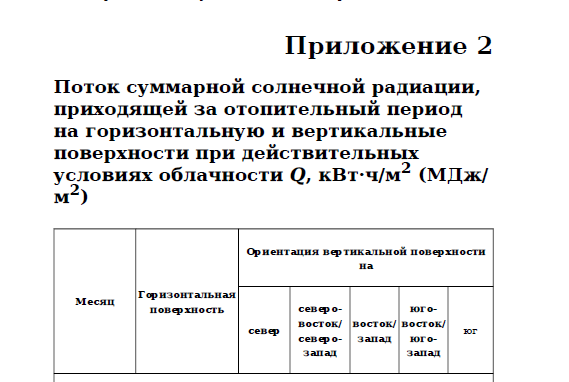
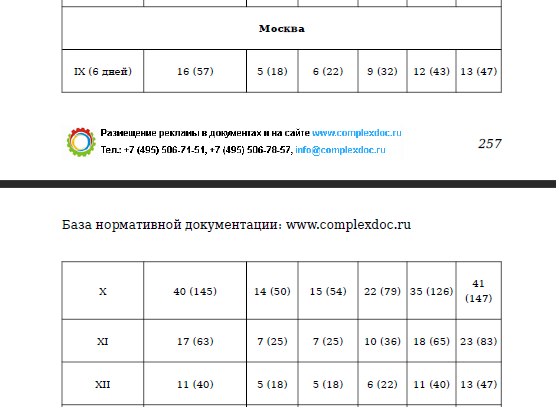

In [16]:
sun_rad_surplus_deсember = {
    'roof': 11,
    'N': 5,
    'NW': 5,
    'W': 6,
    'SW': 11,
    'S': 13,
}

In [17]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

class ThermalLoadCalculator:
    def __init__(self):
        self.columns = [
            'Секция_имя',
            'теплопотери_кВт',
            'площадь_крыши_м2',
            'площадь_С_м2',
            'площадь_Ю_м2',
            'площадь_З_м2',
            'площадь_В_м2',
            'теплопоступления_рад_кВт',
            'теплопотери с учетом теплопоступлений_кВт',
            'теплопоступления от приборов_кВт',
            'запас на регулирование_%',
            'теплопотери трубами_кВт',
            'суммарная нагрузка на систему отопления_кВт',
        ]
        self.df = pd.DataFrame(columns=self.columns)

    def add_section(self, 
                   section_name: str,
                   heat_loss: float,
                   area_roof: float,
                   area_north: float,
                   area_south: float,
                   area_west: float,
                   area_east: float,
                   heater_power: float,
                   pipe_heatlosses: float,
                   ):
        """
        Добавляет новую секцию в DataFrame
        """
        heat_gain = round(area_north*sun_rad_surplus_deсember['N']/(31*24) 
                          + area_west*sun_rad_surplus_deсember['W']/(31*24) 
                          + area_east*sun_rad_surplus_deсember['W']/(31*24)  
                          + area_south*sun_rad_surplus_deсember['S']/(31*24)  
                          + area_roof*sun_rad_surplus_deсember['roof']/(31*24) 
                          , 2)
        total_heating_load = round(heat_loss - heat_gain, 3)

        new_row = {
            'Секция_имя': section_name,
            'теплопотери_кВт': heat_loss,
            'площадь_крыши_м2': area_roof,
            'площадь_С_м2': area_north,
            'площадь_Ю_м2': area_south,
            'площадь_З_м2': area_west,
            'площадь_В_м2': area_east,
            'теплопоступления_рад_кВт': heat_gain,
            'теплопотери с учетом теплопоступлений_кВт': total_heating_load,
            'теплопоступления от приборов_кВт': heater_power,
            'запас на регулирование_%': int((heater_power/total_heating_load)* 100 - 100),
            'теплопотери трубами_кВт': pipe_heatlosses,
            'суммарная нагрузка на систему отопления_кВт': round(pipe_heatlosses+heater_power, 3),
        }
        self.df = pd.concat(
            [self.df, pd.DataFrame([new_row])], 
            ignore_index=True, 
            sort=False
        )

    def get_dataframe(self):
        """Возвращает текущий DataFrame"""
        return self.df

    def save_to_csv(self, filename: str):
        """Сохраняет DataFrame в CSV файл"""
        self.df.to_csv(filename, index=False, encoding='utf-8-sig', sep=';')

In [18]:
calculator = ThermalLoadCalculator()
calculator.add_section(
    section_name="Секция C1",
    heat_loss=554.625,
    area_roof=15.1*35.5,
    area_north=15.1*82.5,
    area_south=15.1*82.5,
    area_west=35.5*82.5,
    area_east=35.5*82.5*(1-0.3),
    heater_power=551.108,
    pipe_heatlosses=15.715,
)
calculator.add_section(
    section_name="Секция C2-C3",
    heat_loss=204.86,
    area_roof=39.4*17.5,
    area_north=39.4*35.5,
    area_south=39.4*35.5,
    area_west=0,
    area_east=0,
    heater_power=197.939,
    pipe_heatlosses=6.001,
)
calculator.add_section(
    section_name="Секция C4",
    heat_loss=158.132,
    area_roof=23.9*15.5,
    area_north=23.9*42.5,
    area_south=23.9*42.5,
    area_west=0,
    area_east=15.9*42.5,
    heater_power=156.938,
    pipe_heatlosses=3.943,
)
calculator.add_section(
    section_name="Секция C5",
    heat_loss=561.357,
    area_roof=35.9*15.1,
    area_north=15.1*76.2,
    area_south=15.1*76.2,
    area_west=35.9*76.2,
    area_east=15.1*76.2*(1-0.4),
    heater_power=564.992,
    pipe_heatlosses=15.562,
)
calculator.add_section(
    section_name="Секция C6-C7",
    heat_loss=191.226,
    area_roof=39.4*17.5,
    area_north=39.4*35.5,
    area_south=39.4*35.5,
    area_west=0,
    area_east=0,
    heater_power=196.377,
    pipe_heatlosses=5.861,
)
calculator.add_section(
    section_name="Секция C8",
    heat_loss=158.222,
    area_roof=23.9*15.5,
    area_north=23.9*42.5,
    area_south=23.9*42.5,
    area_west=0,
    area_east=15.9*42.5,
    heater_power=157.006,
    pipe_heatlosses=3.999,
)
calculator.add_section(
    section_name="Секция C9",
    heat_loss=778.487,
    area_roof=35.9*20.25,
    area_north=20.25*88.36,
    area_south=20.25*88.36,
    area_west=35.9*88.36,
    area_east=35.9*88.36,
    heater_power=763.226,
    pipe_heatlosses=15.212,
)
print(calculator.get_dataframe())
calculator.save_to_csv('beside2.csv')

print(f"Суммарные теплопотери с учетом теплопостплений = {sum(calculator.get_dataframe()['теплопотери с учетом теплопоступлений_кВт'])} кВт")   
print(f"Суммарные теплопотери трубами_кВт = {sum(calculator.get_dataframe()['теплопотери трубами_кВт'])} кВт")   
print(f"суммарная теплопоступления от приборов_кВт = {sum(calculator.get_dataframe()['теплопоступления от приборов_кВт'])} кВт")
print(f"суммарная нагрузка на систему отопления_кВт = {sum(calculator.get_dataframe()['суммарная нагрузка на систему отопления_кВт'])} кВт")


     Секция_имя  теплопотери_кВт  площадь_крыши_м2  площадь_С_м2  площадь_Ю_м2  площадь_З_м2  площадь_В_м2  теплопоступления_рад_кВт  теплопотери с учетом теплопоступлений_кВт  теплопоступления от приборов_кВт запас на регулирование_%  теплопотери трубами_кВт  суммарная нагрузка на систему отопления_кВт
0     Секция C1          554.625           536.050       1245.75       1245.75      2928.750      2050.125                     78.22                                    476.405                           551.108                       15                   15.715                                      566.823
1  Секция C2-C3          204.860           689.500       1398.70       1398.70         0.000         0.000                     44.03                                    160.830                           197.939                       23                    6.001                                      203.940
2     Секция C4          158.132           370.450       1015.75       1015.75       

C:\Users\Donchenko_M\AppData\Local\Temp\ipykernel_111996\729596913.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat(
